In [1]:
import tensorflow as tf
from sklearn.datasets import make_circles

X, y = make_circles(1000,
                    noise=0.03,
                    random_state=42)

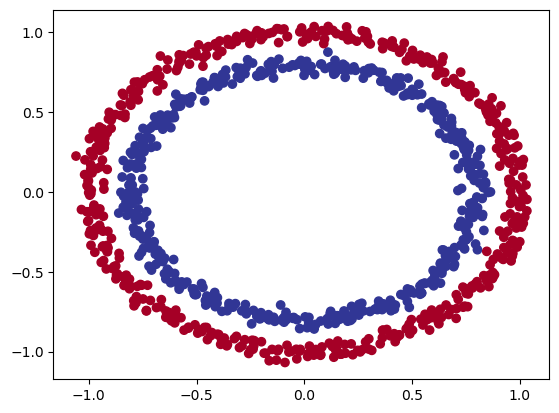

In [2]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [3]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [4]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set

((800, 2), (200, 2))

In [11]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(5, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(5, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=30)


Epoch 1/30
25/25 [==============================] - 0s 535us/step - loss: 0.7008 - accuracy: 0.5050
Epoch 2/30
25/25 [==============================] - 0s 554us/step - loss: 0.6838 - accuracy: 0.5163
Epoch 3/30
25/25 [==============================] - 0s 453us/step - loss: 0.6699 - accuracy: 0.5775
Epoch 4/30
25/25 [==============================] - 0s 427us/step - loss: 0.6472 - accuracy: 0.6375
Epoch 5/30
25/25 [==============================] - 0s 484us/step - loss: 0.6124 - accuracy: 0.7038
Epoch 6/30
25/25 [==============================] - 0s 468us/step - loss: 0.5606 - accuracy: 0.8425
Epoch 7/30
25/25 [==============================] - 0s 458us/step - loss: 0.4895 - accuracy: 0.9237
Epoch 8/30
25/25 [==============================] - 0s 447us/step - loss: 0.3960 - accuracy: 0.9550
Epoch 9/30
25/25 [==============================] - 0s 441us/step - loss: 0.3089 - accuracy: 0.9775
Epoch 10/30
25/25 [==============================] - 0s 495us/step - loss: 0.2353 - accuracy: 0.9962

In [12]:
# Evaluate
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 612us/step - loss: 0.0230 - accuracy: 0.9950


[0.022957732900977135, 0.9950000047683716]

313/313 [==============================] - 0s 275us/step
doing binary classifcation...
313/313 [==============================] - 0s 251us/step
doing binary classifcation...


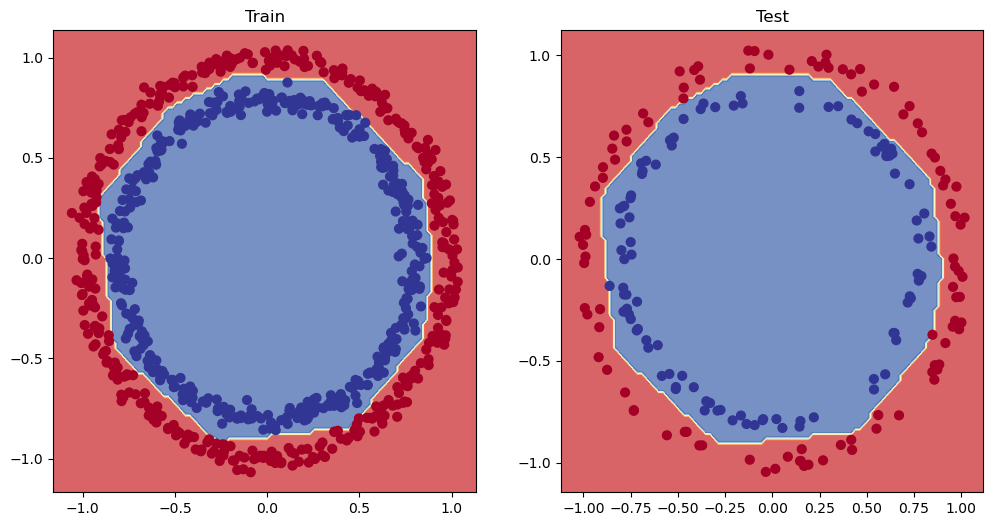

In [13]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

In [14]:
import pandas as pd
# You can access the information in the history variable using the .history attribute
pd.DataFrame(history.history)

,loss,accuracy
0,0.700845,0.50500
1,0.683780,0.51625
2,0.669907,0.57750
3,0.647241,0.63750
4,0.612434,0.70375
5,0.560583,0.84250
6,0.489536,0.92375
7,0.395978,0.95500
8,0.308877,0.97750
9,0.235298,0.99625


Text(0.5, 1.0, 'Model_8 training curves')

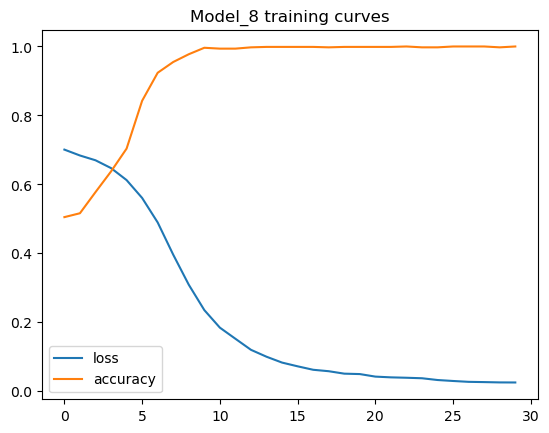

In [15]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 training curves")